<a href="https://colab.research.google.com/github/sinhaharsh580/MachineLearning/blob/main/mids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support  
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
missing_values = ["n/a", "na", "-"]
df=pd.read_csv('Train_Test_Network.csv',na_values=missing_values)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,16,20,21,22,23,24,25,26,27,28,29,31,32,37,38,39,40,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_query,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,ssl_subject,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,NaN,80549.530260,1762852,41933215,OTH,0,252181,14911156,2,236,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,bad_TCP_checksum,NaN,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,NaN,0.000000,0,0,S0,0,1,63,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,NaN,0.000000,0,0,OTH,0,0,0,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,bad_TCP_checksum,NaN,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,NaN,0.000000,0,0,OTH,0,0,0,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,SHR,0,0,0,2,354,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,bad_UDP_checksum,NaN,F,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461038,1556340862,192.168.1.32,33108,176.28.50.165,80,tcp,NaN,0.000000,0,0,S0,0,1,60,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,xss
461039,1556423390,192.168.1.33,37242,34.230.157.88,443,tcp,NaN,0.000000,0,0,OTH,0,0,0,1,103,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,ransomware
461040,1556436603,192.168.1.37,4444,192.168.1.193,49178,tcp,NaN,290.371539,101568,2592,OTH,0,108,108064,31,3832,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,backdoor
461041,1556540442,192.168.1.31,60816,104.98.29.100,443,tcp,NaN,23.190902,32,31,SF,0,8,411,7,395,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,mitm


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ts                      461043 non-null  int64  
 1   src_ip                  461043 non-null  object 
 2   src_port                461043 non-null  int64  
 3   dst_ip                  461043 non-null  object 
 4   dst_port                461043 non-null  int64  
 5   proto                   461043 non-null  object 
 6   service                 180827 non-null  object 
 7   duration                461043 non-null  float64
 8   src_bytes               461043 non-null  int64  
 9   dst_bytes               461043 non-null  int64  
 10  conn_state              461043 non-null  object 
 11  missed_bytes            461043 non-null  int64  
 12  src_pkts                461043 non-null  int64  
 13  src_ip_bytes            461043 non-null  int64  
 14  dst_pkts            

In [4]:
df.isnull().sum()

ts                             0
src_ip                         0
src_port                       0
dst_ip                         0
dst_port                       0
proto                          0
service                   280216
duration                       0
src_bytes                      0
dst_bytes                      0
conn_state                     0
missed_bytes                   0
src_pkts                       0
src_ip_bytes                   0
dst_pkts                       0
dst_ip_bytes                   0
dns_query                 366019
dns_qclass                     0
dns_qtype                      0
dns_rcode                      0
dns_AA                    365158
dns_RD                    365158
dns_RA                    365158
dns_rejected              365158
ssl_version               460737
ssl_cipher                460737
ssl_resumed               460352
ssl_established           460352
ssl_subject               461034
ssl_issuer                461034
http_trans

In [5]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['src_ip', 'dst_ip', 'proto', 'service', 'conn_state', 'dns_query',
       'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected', 'ssl_version',
       'ssl_cipher', 'ssl_resumed', 'ssl_established', 'ssl_subject',
       'ssl_issuer', 'http_method', 'http_uri', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_notice', 'type'],
      dtype='object')


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ts                      461043 non-null  int64  
 1   src_ip                  461043 non-null  int64  
 2   src_port                461043 non-null  int64  
 3   dst_ip                  461043 non-null  int64  
 4   dst_port                461043 non-null  int64  
 5   proto                   461043 non-null  int64  
 6   service                 461043 non-null  int64  
 7   duration                461043 non-null  float64
 8   src_bytes               461043 non-null  int64  
 9   dst_bytes               461043 non-null  int64  
 10  conn_state              461043 non-null  int64  
 11  missed_bytes            461043 non-null  int64  
 12  src_pkts                461043 non-null  int64  
 13  src_ip_bytes            461043 non-null  int64  
 14  dst_pkts            

In [ ]:
df

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_query,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,ssl_subject,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,8047,1883,1511,52976,1,6,80549.530260,1762852,41933215,0,0,252181,14911156,2,236,10805,0,0,0,2,2,2,2,3,5,2,2,5,4,NaN,3,73,NaN,0,0,0,34,2,6,4,NaN,0,0,5
1,1554198358,4614,47260,1522,15600,2,6,0.000000,0,0,6,0,1,63,0,0,10805,0,0,0,2,2,2,2,3,5,2,2,5,4,NaN,3,73,NaN,0,0,0,34,2,6,10,NaN,1,0,5
2,1554198359,4590,1880,1511,51782,1,6,0.000000,0,0,0,0,0,0,0,0,10805,0,0,0,2,2,2,2,3,5,2,2,5,4,NaN,3,73,NaN,0,0,0,34,2,6,4,NaN,0,0,5
3,1554198359,4590,34296,1511,10502,1,6,0.000000,0,0,0,0,0,0,0,0,10805,0,0,0,2,2,2,2,3,5,2,2,5,4,NaN,3,73,NaN,0,0,0,34,2,6,10,NaN,1,0,5
4,1554198362,4590,46608,1516,53,2,2,0.000549,0,298,12,0,0,0,2,354,10805,0,0,0,2,2,2,2,3,5,2,2,5,4,NaN,3,73,NaN,0,0,0,34,2,6,5,NaN,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461038,1556340862,4604,33108,1276,80,1,6,0.000000,0,0,6,0,1,60,0,0,10805,0,0,0,2,2,2,2,3,5,2,2,5,4,NaN,3,73,NaN,0,0,0,34,2,6,10,NaN,1,1,9
461039,1556423390,4605,37242,4154,443,1,6,0.000000,0,0,0,0,0,0,1,103,10805,0,0,0,2,2,2,2,3,5,2,2,5,4,NaN,3,73,NaN,0,0,0,34,2,6,10,NaN,1,1,7
461040,1556436603,4608,4444,1518,49178,1,6,290.371539,101568,2592,0,0,108,108064,31,3832,10805,0,0,0,2,2,2,2,3,5,2,2,5,4,NaN,3,73,NaN,0,0,0,34,2,6,10,NaN,1,1,0
461041,1556540442,4603,60816,104,443,1,6,23.190902,32,31,10,0,8,411,7,395,10805,0,0,0,2,2,2,2,3,5,2,2,5,4,NaN,3,73,NaN,0,0,0,34,2,6,10,NaN,1,1,4


In [7]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [8]:
x

array([[1.55419836e+09, 8.04700000e+03, 1.88300000e+03, ...,
                   nan, 0.00000000e+00, 0.00000000e+00],
       [1.55419836e+09, 4.61400000e+03, 4.72600000e+04, ...,
                   nan, 1.00000000e+00, 0.00000000e+00],
       [1.55419836e+09, 4.59000000e+03, 1.88000000e+03, ...,
                   nan, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.55643660e+09, 4.60800000e+03, 4.44400000e+03, ...,
                   nan, 1.00000000e+00, 1.00000000e+00],
       [1.55654044e+09, 4.60300000e+03, 6.08160000e+04, ...,
                   nan, 1.00000000e+00, 1.00000000e+00],
       [1.55654044e+09, 4.60300000e+03, 4.10540000e+04, ...,
                   nan, 1.00000000e+00, 1.00000000e+00]])

In [9]:
x.shape

(461043, 44)

In [10]:
type(x)

numpy.ndarray

In [11]:
y

array([5, 5, 5, ..., 0, 4, 4])

In [12]:
type(y)

numpy.ndarray

In [13]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(x)
x = imputer.transform(x)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.6, random_state = 0)

In [15]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x_train)
x_train=norm.transform(x_train)

In [16]:
x_test=norm.transform(x_test)

In [17]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

Accuracy of XGBoost: 0.9958427624301404
Precision of XGBoost: 0.9959594190684044
Recall of XGBoost: 0.9958427624301404
F1-score of XGBoost: 0.9958537849307184
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12092
           1       0.94      0.99      0.96     11963
           2       1.00      0.96      0.98     12027
           3       0.99      0.96      0.97     11943
           4       1.00      1.00      1.00       654
           5       1.00      1.00      1.00    180006
           6       0.98      0.99      0.99     11981
           7       1.00      1.00      1.00     11942
           8       1.00      1.00      1.00     12045
           9       1.00      1.00      1.00     11973

    accuracy                           1.00    276626
   macro avg       0.99      0.99      0.99    276626
weighted avg       1.00      1.00      1.00    276626

[[ 12092      0      0      0      0      0      0      0      0      0]
 [     0 

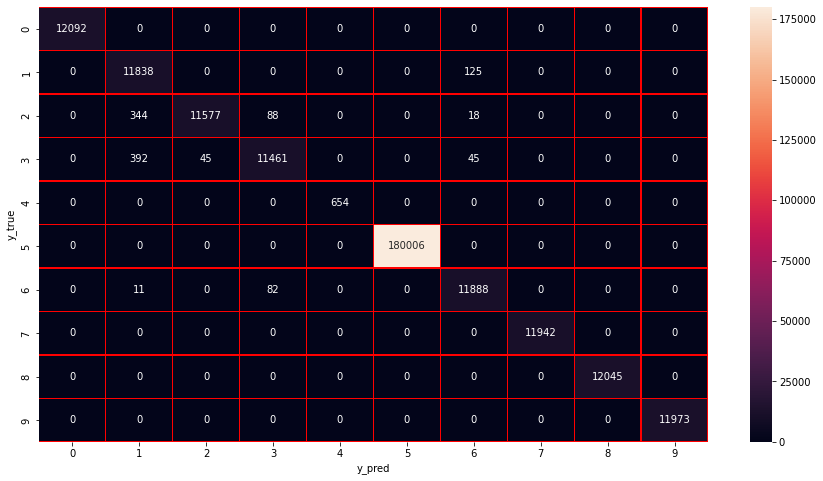

In [18]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(x_train,y_train)
xg_score=xg.score(x_test,y_test)
y_predict=xg.predict(x_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
print(cm)
f,ax=plt.subplots(figsize=(15,8))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
pred_prob1 = xg.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

Accuracy of RF: 0.9998264805188233
Precision of RF: 0.9998265678005716
Recall of RF: 0.9998264805188233
F1-score of RF: 0.9998264450939923
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12092
           1       1.00      1.00      1.00     11963
           2       1.00      1.00      1.00     12027
           3       1.00      1.00      1.00     11943
           4       1.00      0.99      1.00       654
           5       1.00      1.00      1.00    180006
           6       1.00      1.00      1.00     11981
           7       1.00      1.00      1.00     11942
           8       1.00      1.00      1.00     12045
           9       1.00      1.00      1.00     11973

    accuracy                           1.00    276626
   macro avg       1.00      1.00      1.00    276626
weighted avg       1.00      1.00      1.00    276626

[[ 12092      0      0      0      0      0      0      0      0      0]
 [     0  11956      3      4

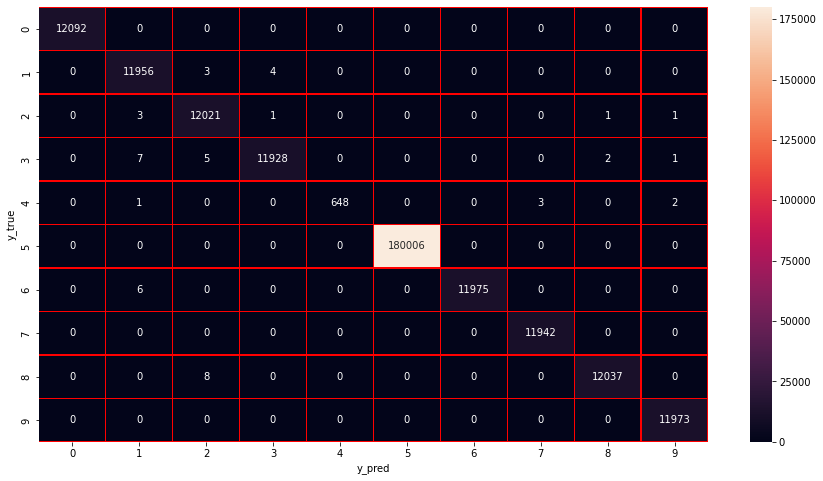

In [19]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train) 
rf_score=clf.score(x_test,y_test)
y_predict=clf.predict(x_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
print(cm)
f,ax=plt.subplots(figsize=(15,8))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
pred_prob2 = clf.predict_proba(x_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy of LR: 0.9998264805188233
Precision of LR: 0.943675990627464
Recall of LR: 0.9450051694345434
F1-score of LR: 0.9433457580162117
              precision    recall  f1-score   support

           0       0.76      0.99      0.86     12092
           1       0.87      0.92      0.89     11963
           2       0.94      0.94      0.94     12027
           3       0.88      0.85      0.86     11943
           4       0.00      0.00      0.00       654
           5       1.00      1.00      1.00    180006
           6       0.74      0.74      0.74     11981
           7       0.78      0.68      0.73     11942
           8       1.00      0.97      0.98     12045
           9       0.77      0.69      0.73     11973

    accuracy                           0.95    276626
   macro avg       0.78      0.78      0.77    276626
weighted avg       0.94      0.95      0.94    276626

[[ 12004      6      0      0      0      0      3     28      0     51]
 [    48  10975     91    552 

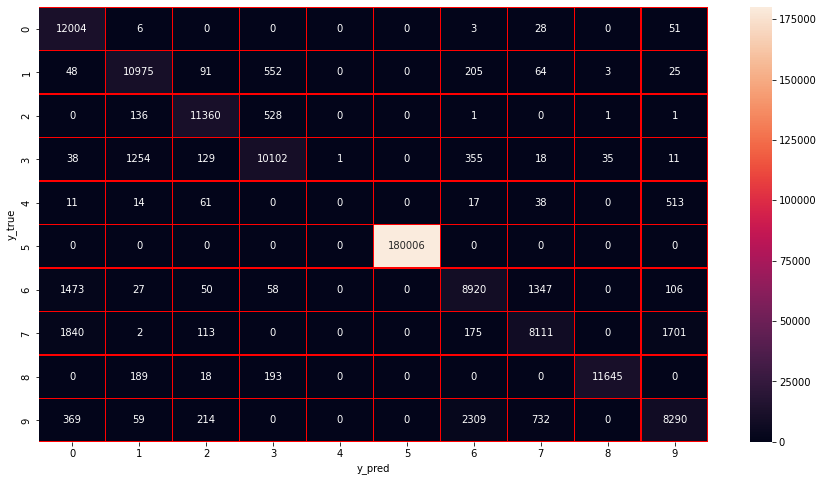

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_score=lr.score(x_test,y_test)
y_predict=lr.predict(x_test)
y_true=y_test
print('Accuracy of LR: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of LR: '+(str(precision)))
print('Recall of LR: '+(str(recall)))
print('F1-score of LR: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
print(cm)
f,ax=plt.subplots(figsize=(15,8))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
pred_prob3 = lr.predict_proba(x_test)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

Accuracy of NB: 0.9997108008647054
Precision of NB: 0.9997119953728651
Recall of NB: 0.9997108008647054
F1-score of NB: 0.9997107857711707
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     12092
           1       1.00      1.00      1.00     11963
           2       1.00      1.00      1.00     12027
           3       1.00      1.00      1.00     11943
           4       1.00      0.99      1.00       654
           5       1.00      1.00      1.00    180006
           6       1.00      1.00      1.00     11981
           7       0.99      1.00      1.00     11942
           8       1.00      1.00      1.00     12045
           9       1.00      1.00      1.00     11973

    accuracy                           1.00    276626
   macro avg       1.00      1.00      1.00    276626
weighted avg       1.00      1.00      1.00    276626

[[ 12028      0      0      0      0      0      0     64      0      0]
 [     0  11958      0      0

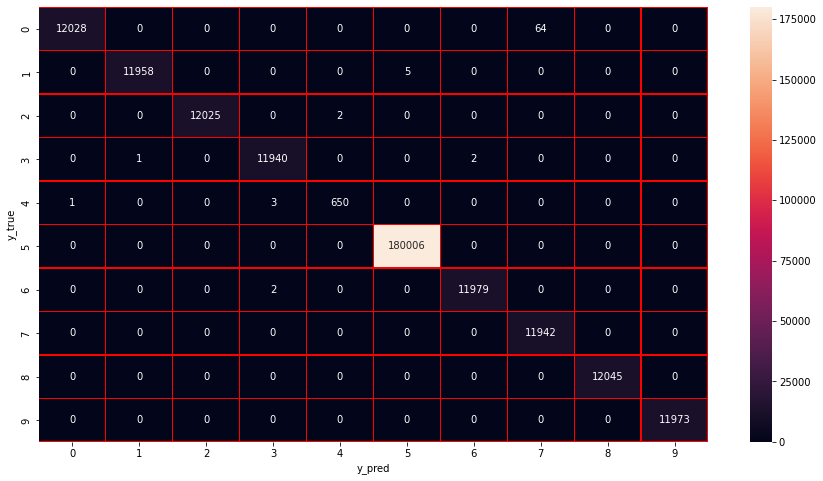

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train) 
gnb_score=gnb.score(x_test,y_test)
y_predict=gnb.predict(x_test)
y_true=y_test
print('Accuracy of NB: '+ str(gnb_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of NB: '+(str(precision)))
print('Recall of NB: '+(str(recall)))
print('F1-score of NB: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
print(cm)
f,ax=plt.subplots(figsize=(15,8))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
pred_prob4 = gnb.predict_proba(x_test)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

Accuracy of SVM: 0.9680290355931835
Precision of SVM: 0.9699353038665791
Recall of SVM: 0.9680290355931835
F1-score of SVM: 0.96753148177868
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12092
           1       0.90      0.93      0.92     11963
           2       0.95      0.98      0.97     12027
           3       0.94      0.88      0.91     11943
           4       0.99      0.63      0.77       654
           5       1.00      1.00      1.00    180006
           6       0.80      0.97      0.88     11981
           7       0.98      0.77      0.86     11942
           8       0.99      0.99      0.99     12045
           9       0.87      0.76      0.81     11973

    accuracy                           0.97    276626
   macro avg       0.93      0.89      0.90    276626
weighted avg       0.97      0.97      0.97    276626

[[ 12024      0      0      0      0      0      3     49      0     16]
 [     1  11100    129    6

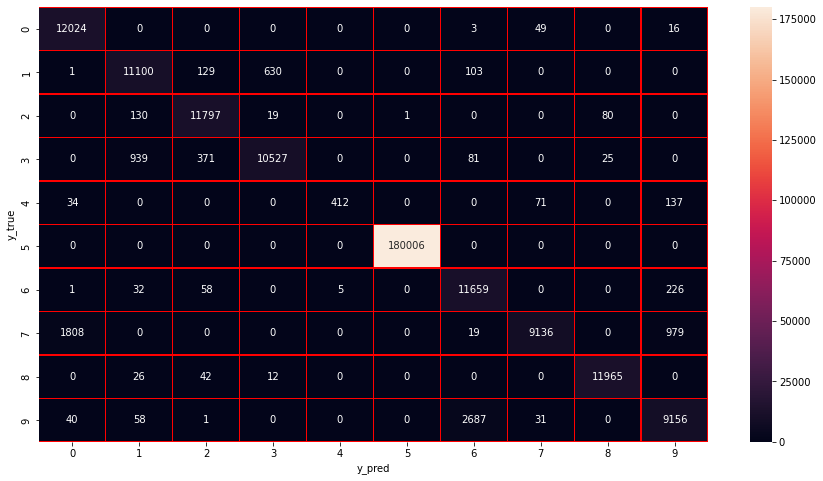

In [22]:
from sklearn.svm import SVC
support=SVC(random_state=10,probability=True)
support.fit(x_train, y_train)
support_score=support.score(x_test,y_test)
y_predict=support.predict(x_test)
y_true=y_test
print('Accuracy of SVM: '+ str(support_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of SVM: '+(str(precision)))
print('Recall of SVM: '+(str(recall)))
print('F1-score of SVM: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
print(cm)
f,ax=plt.subplots(figsize=(15,8))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
pred_prob5 = support.predict_proba(x_test)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

Accuracy of KNN: 0.9970501688199952
Precision of KNN: 0.9970498562189204
Recall of KNN: 0.9970501688199952
F1-score of KNN: 0.9970478269051449
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12092
           1       0.98      0.98      0.98     11963
           2       0.99      0.99      0.99     12027
           3       0.98      0.98      0.98     11943
           4       0.96      0.93      0.94       654
           5       1.00      1.00      1.00    180006
           6       1.00      0.99      0.99     11981
           7       1.00      1.00      1.00     11942
           8       1.00      0.99      1.00     12045
           9       0.99      0.99      0.99     11973

    accuracy                           1.00    276626
   macro avg       0.99      0.99      0.99    276626
weighted avg       1.00      1.00      1.00    276626

[[ 12082      0      0      2      4      0      3      1      0      0]
 [     0  11760     26   

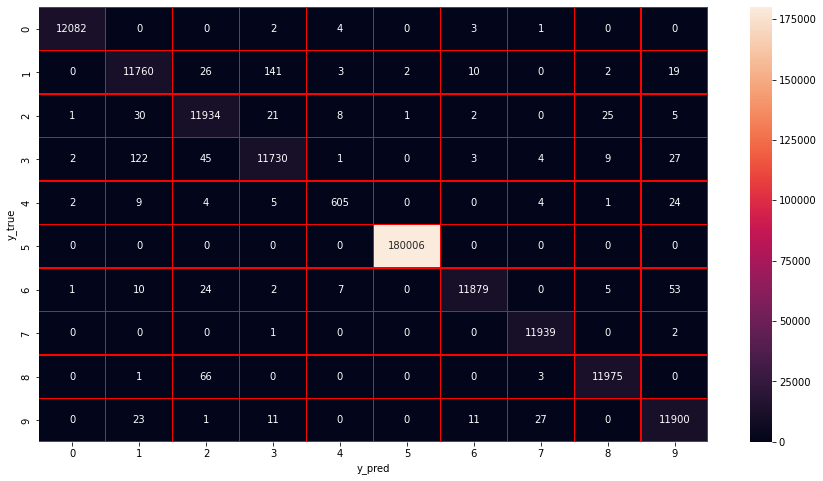

In [23]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
knn_score=knn.score(x_test,y_test)
y_predict=knn.predict(x_test)
y_true=y_test
print('Accuracy of KNN: '+ str(knn_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of KNN: '+(str(precision)))
print('Recall of KNN: '+(str(recall)))
print('F1-score of KNN: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
print(cm)
f,ax=plt.subplots(figsize=(15,8))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
pred_prob6 = clf.predict_proba(x_test)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

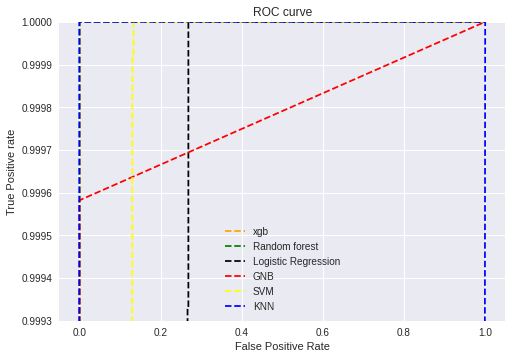

In [80]:
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='xgb')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random forest')
plt.plot(fpr3, tpr3, linestyle='--',color='black', label='Logistic Regression')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='GNB')
plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='SVM')
plt.plot(fpr6, tpr6, linestyle='--',color='blue', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=700)
plt.ylim((0.9993,1.0))
plt.show()